In [97]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

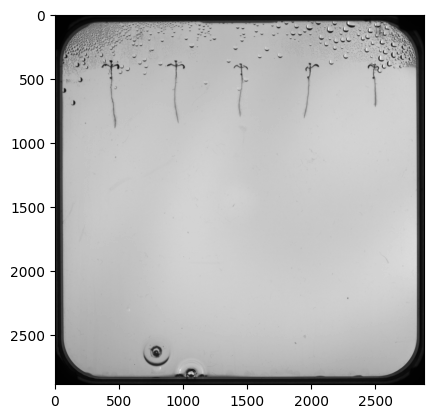

In [98]:
im_p1 = cv2.imread('plants_1_cut.png', cv2.IMREAD_GRAYSCALE)
im1 = im_p1.copy()
im_p2 = cv2.imread('plants_2_cut.png', cv2.IMREAD_GRAYSCALE)
im2 = im_p2.copy()
plt.imshow(im_p1, cmap='gray')

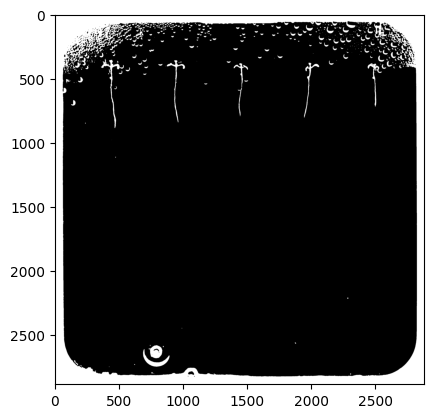

In [99]:
blurred = cv2.GaussianBlur(im1, (5,5), 0)
contrast_enhanced = cv2.equalizeHist(blurred)

# Thresholding
ret, thresh = cv2.threshold(contrast_enhanced, 30, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

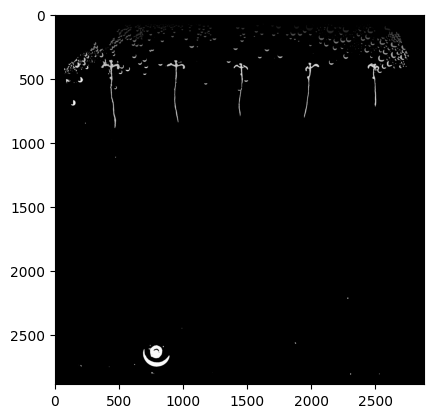

In [100]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)
plt.imshow(labels, cmap='gray')

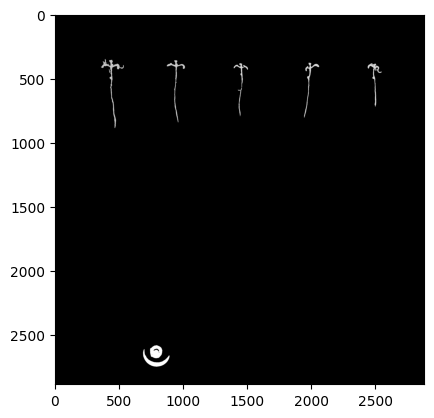

In [101]:
alternative = skimage.morphology.remove_small_objects(labels, min_size=3500)
plt.imshow(alternative, cmap='gray')

In [105]:
alternative = np.where(alternative > 0, 255, 0)
alternative = np.uint8(alternative)

In [110]:
circles = cv2.HoughCircles(alternative, cv2.HOUGH_GRADIENT, 1, 1000, param1=50, param2=30, minRadius=25, maxRadius=150)
circles.shape

(1, 2, 3)

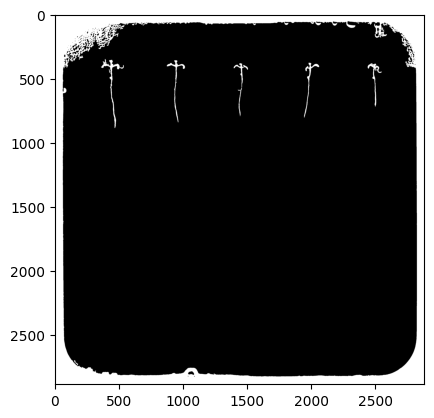

In [119]:
if circles is not None:
    for (x, y, r) in circles[0, :]:
        if y > 2500:
            x, y, r = int(x), int(y), int(r)
            cv2.circle(alternative, (x, y), r+10, 0, thickness=-1)

# Display the result
plt.imshow(alternative, cmap='gray')
plt.show()
